# Data Exploration

This notebooks explores several spatial datasets related to groundwater resources and hydro-geological formations in Germany.

A summary and interpretation of the results is included at the end of each section.

unique datasets: 
-   bergbaugebiete_v1_poly
-   gwerg_erg_v11_poly
-   gwerg_gestein_v1_poly
-   gwerg__v11_poly
-   uferfiltrat_v1_poly
-   uferfiltrat_v1_line

In [1]:
# Import necessary packages
from dbfread import DBF
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
from pyhere import here
from pyproj import CRS

### 1. Load the provided datasets

In [ ]:
# datasets not provided as csvs. 
# screen folder for .dbf, .shp, and .prj files, load as (geo)pandas dfs, save (g)dfs in dicts with filenames as keys
dfs = {}
gdfs = {}
crss = {}
folder_path = here("ERGW1000/ERGW1000_v1/shp")
for file in os.listdir(folder_path):
    if file.endswith(".dbf"):
        # create short filename
        filename = file.replace("ergw1000_", "").replace(".dbf", "")
        path_to_file = os.path.join(folder_path, file)
        table = DBF(path_to_file, load=True,  encoding="utf-8")
        #convert to pandas df
        df = pd.DataFrame(iter(table))
        #save to dict
        dfs[filename] = df
    if file.endswith(".shp"):
        # create short filename
        filename = file.replace("ergw1000_", "").replace(".shp", "")
        path_to_shapefile = os.path.join(folder_path, file)
        gdf = gpd.read_file(path_to_shapefile)
        #save to dict
        gdfs[filename] = gdf
    if file.endswith(".prj"):  
        # to make sure that EPSG code and projection type align
        # create short filename
        filename = file.replace("ergw1000_", "").replace(".shp", "")
        path_to_prjfile = os.path.join(folder_path, file) 
        prj = open(path_to_prjfile).read()
        crs = CRS.from_wkt(prj)
        crss[filename]=crs


### 2. Perform EDA

#### 2.1 Check the structure, missing values, and basic statistics of each dataset


#### 2.2​ Identify unique values for key categorical features

In [3]:
# summary function

def make_summary(file: str):
    '''Creates summary stats of file.
    
    input: filename
    
    output: summary stats'''

    df = dfs[file]
    print("Dataset:", file)
    print("")
    # general stats
    display(df.info())
    display(df.describe())
    # missings
    print("Missing values")
    display(df.isnull().sum())
    if df.select_dtypes(['object']).shape[1] > 0:
        #unique values of categorical features
        print('unique values categorical features')
        if 'bedeutung' in df.columns:
            cat_cols = list(df.select_dtypes(['object']).columns)
            id_cols = [c for c in df.columns if '_id' in c]
            display(df.groupby(id_cols + cat_cols).size().reset_index(name='count'))
        else:
            display(df.select_dtypes(['object']).value_counts())

In [4]:
# assert CRS consistency

pd.set_option('display.max_colwidth', None) 
display(pd.DataFrame.from_dict(crss, orient='index'))

,0
uferfiltrat__v1_line.prj,"PROJCS[""ETRS_1989_LCC"",GEOGCS[""GCS_ETRS_1989"",DATUM[""D_ETRS_1989"",SPHEROID[""GRS_1980"",6378137.0,298.257222101]],PRIMEM[""Greenwich"",0.0],UNIT[""Degree"",0.0174532925199433]],PROJECTION[""Lambert_Conformal_Conic""],PARAMETER[""False_Easting"",4000000.0],PARAMETER[""False_Northing"",2800000.0],PARAMETER[""Central_Meridian"",10.0],PARAMETER[""Standard_Parallel_1"",35.0],PARAMETER[""Standard_Parallel_2"",65.0],PARAMETER[""Latitude_Of_Origin"",52.0],UNIT[""Meter"",1.0]]"
gwerg_gestein_v1_poly.prj,"PROJCS[""ETRS_1989_LCC"",GEOGCS[""GCS_ETRS_1989"",DATUM[""D_ETRS_1989"",SPHEROID[""GRS_1980"",6378137.0,298.257222101]],PRIMEM[""Greenwich"",0.0],UNIT[""Degree"",0.0174532925199433]],PROJECTION[""Lambert_Conformal_Conic""],PARAMETER[""False_Easting"",4000000.0],PARAMETER[""False_Northing"",2800000.0],PARAMETER[""Central_Meridian"",10.0],PARAMETER[""Standard_Parallel_1"",35.0],PARAMETER[""Standard_Parallel_2"",65.0],PARAMETER[""Latitude_Of_Origin"",52.0],UNIT[""Meter"",1.0]]"
gwerg__v11_poly.prj,"PROJCS[""ETRS_1989_LCC"",GEOGCS[""GCS_ETRS_1989"",DATUM[""D_ETRS_1989"",SPHEROID[""GRS_1980"",6378137.0,298.257222101]],PRIMEM[""Greenwich"",0.0],UNIT[""Degree"",0.0174532925199433]],PROJECTION[""Lambert_Conformal_Conic""],PARAMETER[""False_Easting"",4000000.0],PARAMETER[""False_Northing"",2800000.0],PARAMETER[""Central_Meridian"",10.0],PARAMETER[""Standard_Parallel_1"",35.0],PARAMETER[""Standard_Parallel_2"",65.0],PARAMETER[""Latitude_Of_Origin"",52.0],UNIT[""Meter"",1.0]]"
gwerg_erg_v11_poly.prj,"PROJCS[""ETRS_1989_LCC"",GEOGCS[""GCS_ETRS_1989"",DATUM[""D_ETRS_1989"",SPHEROID[""GRS_1980"",6378137.0,298.257222101]],PRIMEM[""Greenwich"",0.0],UNIT[""Degree"",0.0174532925199433]],PROJECTION[""Lambert_Conformal_Conic""],PARAMETER[""False_Easting"",4000000.0],PARAMETER[""False_Northing"",2800000.0],PARAMETER[""Central_Meridian"",10.0],PARAMETER[""Standard_Parallel_1"",35.0],PARAMETER[""Standard_Parallel_2"",65.0],PARAMETER[""Latitude_Of_Origin"",52.0],UNIT[""Meter"",1.0]]"
bergbaugebiete__v1_poly.prj,"PROJCS[""ETRS_1989_LCC"",GEOGCS[""GCS_ETRS_1989"",DATUM[""D_ETRS_1989"",SPHEROID[""GRS_1980"",6378137.0,298.257222101]],PRIMEM[""Greenwich"",0.0],UNIT[""Degree"",0.0174532925199433]],PROJECTION[""Lambert_Conformal_Conic""],PARAMETER[""False_Easting"",4000000.0],PARAMETER[""False_Northing"",2800000.0],PARAMETER[""Central_Meridian"",10.0],PARAMETER[""Standard_Parallel_1"",35.0],PARAMETER[""Standard_Parallel_2"",65.0],PARAMETER[""Latitude_Of_Origin"",52.0],UNIT[""Meter"",1.0]]"


In [5]:
len(set(list(crss.values())))

1

All CRS are projected and the projections are the same.

In [6]:
# simple pandas EDA
filenames = list(dfs.keys())
iterator = iter(filenames)

In [7]:
file = next(iterator)
make_summary(file)

Dataset: gwerg_gestein_v1_poly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gestein_id  4 non-null      int64  
 1   gestein     4 non-null      object 
 2   Shape_STAr  4 non-null      float64
 3   Shape_STLe  4 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 260.0+ bytes


None

,gestein_id,Shape_STAr,Shape_STLe
count,4.000000,4.000000e+00,4.000000e+00
mean,1.500000,8.367160e+10,1.666899e+07
std,1.290994,6.596082e+10,8.907157e+06
min,0.000000,2.193712e+10,6.968575e+06
25%,0.750000,3.527179e+10,1.045299e+07
50%,1.500000,7.343578e+10,1.674008e+07
75%,2.250000,1.218356e+11,2.295608e+07
max,3.000000,1.658777e+11,2.622725e+07


Missing values


gestein_id    0
gestein       0
Shape_STAr    0
Shape_STLe    0
dtype: int64

unique values categorical features


gestein                                                        
                                                                   1
Kalkstein, Dolomit, Gips (Karstwasserleiter)                       1
Sand, Kies, Tuff (Porenwasserleiter)                               1
Sandstein, Quarzit, Basalt, Kalkmergelstein (Kluftwasserleiter)    1
Name: count, dtype: int64

In [8]:
# plot only region where one of the 3 rock types are found (disregard 9  gestein_id)

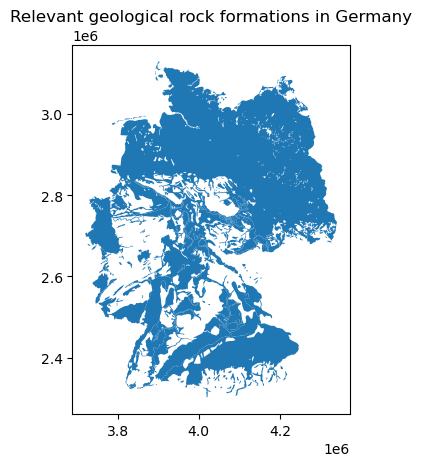

In [9]:
gdf = gdfs[file]
gdf[gdf["gestein_id"] != 0].plot()
plt.title('Relevant geological rock formations in Germany')
plt.show()
plt.close()


Dataset: ergw1000_gwerg_gestein_v1_poly


-   Contains the unique types of water-bearing rocks (column "gestein", 3 unique values) in Germany and corresponding ids ("gestein_id"). 
-   The id 0 refers to empty field in "gestein" column, which likely refers to "no water bearing rocks" (could be a nan value though, too).
-   Columns "Shape_STAr" and "Shape_STLe" refer to the size and cirumference, respectively, of the total areas in Germany rock types


In [10]:
file = next(iterator)
make_summary(file)

Dataset: bergbaugebiete__v1_poly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dummy_      17 non-null     int64  
 1   Shape_STAr  17 non-null     float64
 2   Shape_STLe  17 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 540.0 bytes


None

,dummy_,Shape_STAr,Shape_STLe
count,17.0,1.700000e+01,17.000000
mean,0.0,3.764313e+08,80009.697758
std,0.0,6.134345e+08,75125.952082
min,0.0,2.655368e+07,20230.199003
25%,0.0,4.876964e+07,32051.936863
50%,0.0,7.479384e+07,44318.133406
75%,0.0,4.231184e+08,102172.003704
max,0.0,2.086606e+09,261324.197057


Missing values


dummy_        0
Shape_STAr    0
Shape_STLe    0
dtype: int64

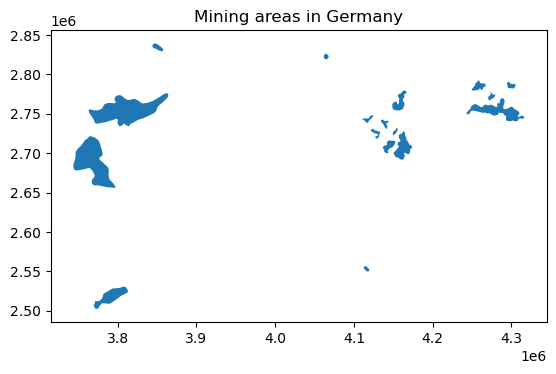

In [11]:
# simple plot
gdf = gdfs[file]
gdf.plot()
plt.title('Mining areas in Germany')
plt.show()
plt.close()

Dataset ergw1000_bergbaugebiete__v1_poly
- dataset denotes the 17 mining areas in Germany
- "dummy_" columns has all values 0
- columns "Shape_STAr" and "Shape_STLe" refer to the size and cirumference of the mining areas

In [12]:
file = next(iterator)
make_summary(file)

Dataset: uferfiltrat__v1_line

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dummy_      131 non-null    int64  
 1   Shape_STLe  131 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.2 KB


None

,dummy_,Shape_STLe
count,131.0,131.000000
mean,0.0,15956.373428
std,0.0,23838.836347
min,0.0,3417.556640
25%,0.0,4923.377071
50%,0.0,6655.355320
75%,0.0,15409.132345
max,0.0,186551.792655


Missing values


dummy_        0
Shape_STLe    0
dtype: int64

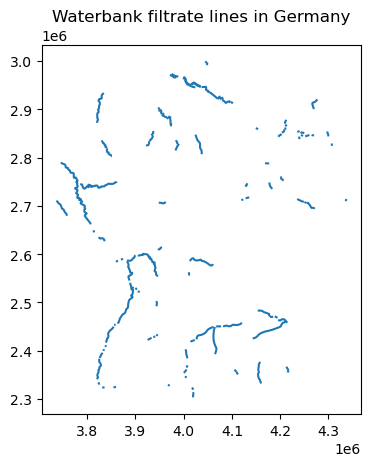

In [13]:
# simple plot
gdf = gdfs[file]
gdf.plot()
plt.title('Waterbank filtrate lines in Germany')
plt.show()
plt.close()

Dataset ergw1000_uferfiltrat__v1_line
- refers to waterbank data (water taken from near a river bank or the like; bank filtrate)
- 131 waterbank lines in total
- all values of the "dummy_" variable are 0
- columns "Shape_STLe" refer to the cirumference of the bank filtrate water

In [14]:
file = next(iterator)
make_summary(file)

Dataset: gwerg_erg_v11_poly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   erg_id      1301 non-null   int64  
 1   bedeutung   1301 non-null   object 
 2   ergiebigke  1301 non-null   object 
 3   entn_bru    1301 non-null   object 
 4   entn_werk   1301 non-null   object 
 5   Shape_STAr  1301 non-null   float64
 6   Shape_STLe  1301 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 71.3+ KB


None

,erg_id,Shape_STAr,Shape_STLe
count,1301.000000,1.301000e+03,1.301000e+03
mean,10.018447,2.572532e+08,8.263410e+04
std,5.676236,1.599624e+09,3.445229e+05
min,0.000000,4.616934e+03,3.220921e+02
25%,11.000000,6.160046e+06,1.211909e+04
50%,13.000000,2.020107e+07,2.349867e+04
75%,13.000000,6.761554e+07,4.976451e+04
max,15.000000,2.709913e+10,7.138607e+06


Missing values


erg_id        0
bedeutung     0
ergiebigke    0
entn_bru      0
entn_werk     0
Shape_STAr    0
Shape_STLe    0
dtype: int64

unique values categorical features


,erg_id,bedeutung,ergiebigke,entn_bru,entn_werk,count
0,0,,,,,308
1,11,Bedeutende Grundwasservorkommen,sehr ergiebig,meist > 40 (l/s),häufig > 5 (hm3/a),63
2,12,Bedeutende Grundwasservorkommen,ergiebig,meist 15 - 40 (l/s),meist 1 - 5 (hm3/a),258
3,13,Bedeutende Grundwasservorkommen,weniger oder wechselnd ergiebig,meist 5 - 15 (l/s),"meist 0,2 - 1 (hm3/a)",353
4,14,Weniger bedeutende Grundwasservorkommen,örtlich in Brunnen und Quellen große Ergiebigkeit möglich; Nutzung aus technischen und hygienischen Gründen eingeschränk,meist < 5 (l/s),,129
5,15,Keine bedeutenden Grundwasservorkommen,örtliche Vorkommen können für die Versorgung wichtig sein,meist < 2 (l/s),,190


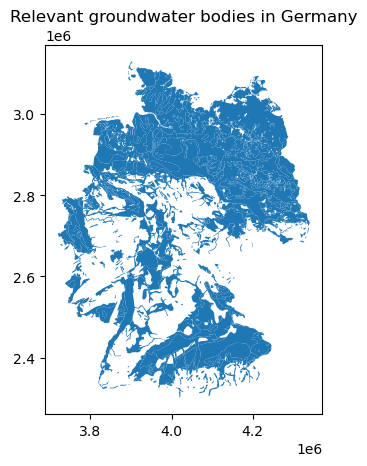

In [15]:
# simple plot, filtering bedeutung == 'Bedeutende Grundwasservorkommen (only areas with significant groundwater levels)
gdf = gdfs[file]
gdf[gdf["erg_id"].isin([11,12,13])].plot() 
plt.title('Relevant groundwater bodies in Germany')
plt.show()
plt.close()

Dataset ergw1000_gwerg_erg_v11_poly
- refers to importance of the groundwater reserves
- "erg_id" is a combined id of the features "ergiebigke" (yield), "bedeutung" (importance), and "ent_bru", "entn_werk" (extraction intensity at well or waterworks) (refering to potential of the groundwater sources)
- 0 likely denotes no relevant groundwater resources
- columns "Shape_STAr" and "Shape_STLe" refer to the size and cirumference of the denoted areas

In [16]:
file = next(iterator)
make_summary(file)

Dataset: gwerg__v11_poly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   erg_id      1473 non-null   int64  
 1   gestein_id  1473 non-null   int64  
 2   bedeutung   1473 non-null   object 
 3   ergiebigke  1473 non-null   object 
 4   entn_bru    1473 non-null   object 
 5   entn_werk   1473 non-null   object 
 6   gestein     1473 non-null   object 
 7   Shape_STAr  1473 non-null   float64
 8   Shape_STLe  1473 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 103.7+ KB


None

,erg_id,gestein_id,Shape_STAr,Shape_STLe
count,1473.000000,1473.000000,1.473000e+03,1.473000e+03
mean,10.353700,1.653768,2.272141e+08,7.708364e+04
std,5.450289,1.334488,1.446169e+09,3.066477e+05
min,0.000000,0.000000,4.616934e+03,3.220921e+02
25%,11.000000,0.000000,7.207284e+06,1.303570e+04
50%,13.000000,2.000000,2.380120e+07,2.582869e+04
75%,13.000000,3.000000,7.901128e+07,5.673716e+04
max,15.000000,3.000000,2.707973e+10,7.132817e+06


Missing values


erg_id        0
gestein_id    0
bedeutung     0
ergiebigke    0
entn_bru      0
entn_werk     0
gestein       0
Shape_STAr    0
Shape_STLe    0
dtype: int64

unique values categorical features


,erg_id,gestein_id,bedeutung,ergiebigke,entn_bru,entn_werk,gestein,count
0,0,0,,,,,,311
1,11,1,Bedeutende Grundwasservorkommen,sehr ergiebig,meist > 40 (l/s),häufig > 5 (hm3/a),"Kalkstein, Dolomit, Gips (Karstwasserleiter)",9
2,11,2,Bedeutende Grundwasservorkommen,sehr ergiebig,meist > 40 (l/s),häufig > 5 (hm3/a),"Sandstein, Quarzit, Basalt, Kalkmergelstein (Kluftwasserleiter)",1
3,11,3,Bedeutende Grundwasservorkommen,sehr ergiebig,meist > 40 (l/s),häufig > 5 (hm3/a),"Sand, Kies, Tuff (Porenwasserleiter)",55
4,12,0,Bedeutende Grundwasservorkommen,ergiebig,meist 15 - 40 (l/s),meist 1 - 5 (hm3/a),,3
5,12,1,Bedeutende Grundwasservorkommen,ergiebig,meist 15 - 40 (l/s),meist 1 - 5 (hm3/a),"Kalkstein, Dolomit, Gips (Karstwasserleiter)",30
6,12,2,Bedeutende Grundwasservorkommen,ergiebig,meist 15 - 40 (l/s),meist 1 - 5 (hm3/a),"Sandstein, Quarzit, Basalt, Kalkmergelstein (Kluftwasserleiter)",46
7,12,3,Bedeutende Grundwasservorkommen,ergiebig,meist 15 - 40 (l/s),meist 1 - 5 (hm3/a),"Sand, Kies, Tuff (Porenwasserleiter)",204
8,13,0,Bedeutende Grundwasservorkommen,weniger oder wechselnd ergiebig,meist 5 - 15 (l/s),"meist 0,2 - 1 (hm3/a)",,1
9,13,1,Bedeutende Grundwasservorkommen,weniger oder wechselnd ergiebig,meist 5 - 15 (l/s),"meist 0,2 - 1 (hm3/a)","Kalkstein, Dolomit, Gips (Karstwasserleiter)",59


Dataset ergw1000_gwerg__v11_poly
- combination of ergw1000_gwerg_erg_v11_poly and ergw1000_gwerg_gestein_v1_poly 
- contains information on the importance of the groundwater reserves as well as on the water bearing rocks
- can show if the types of water bearing rocks and the groundwater relevance are relate, and vice versa
- columns "Shape_STAr" and "Shape_STLe" refer to the size and cirumference of the denoted areas

#### 2.3​ Investigate spatial relationships between different datasets

##### How do groundwater regions overlap with mining areas?

In [17]:
# mining data: add id to identify mining regions
mining_gdf = gdfs['bergbaugebiete__v1_poly'].reset_index(names='mining_id')
# groundwater data: filter only for "Bedeutende Grundwasservorkommen" (relevant groundwater storage), corresponding to 'erg_id' 11,12,13
water_gdf = gdfs['gwerg_erg_v11_poly']
water_gdf= water_gdf[water_gdf["erg_id"].isin([11,12,13])]

In [18]:
# perform spatial join
water_mining_gdf = gpd.sjoin(water_gdf, mining_gdf,  how="left", predicate="intersects")


In [19]:
print(f"{water_mining_gdf['mining_id'].nunique()} of the {mining_gdf['mining_id'].nunique()} mining areas in Germany overlap with relevant groundwater areas")

17 of the 17 mining areas in Germany overlap with relevant groundwater areas


In [20]:
# reinsure that both shapefiles are in projected coordinate system (we already checked that it is the same CRS and projection in the beginning of the notebook)
print(mining_gdf.crs.is_projected)
print(water_gdf.crs.is_projected)

True
True


In [40]:
# Calculate the overlapping area
overlapping_areas = gpd.overlay(mining_gdf, water_gdf, how="intersection")

# Calculate the area of overlapping regions
overlapping_areas["overlap_area"] = overlapping_areas.geometry.area

# Sum total overlap
total_overlap = overlapping_areas["overlap_area"].sum()

# Show total overlap
overlap_km2 = round(total_overlap/1_000_000, 2)
print(f"The total overlapping area of mining zones with groundwater zones is: {overlap_km2} square kms")

# as share of all mining areas
mining_area_km2 = (mining_gdf.geometry.area.sum() / 1_000_000)
print(f"The share of mining areas overlapping with relevant groundwater areas is: {round(overlap_km2 / mining_area_km2,2)}")

# mining areas as share of relevant groundwater areas
water_area_km2 = water_gdf.geometry.area.sum() / 1_000_000
print(f"The share of relevant groundwater carrying area overlapping with mining areas is: {round(overlap_km2 / water_area_km2,2)}")

The total overlapping area of mining zones with groundwater zones is: 4711.51 square kms
The share of mining areas overlapping with relevant groundwater areas is: 0.74
The share of relevant groundwater carrying area overlapping with mining areas is: 0.02


##### Are mining areas related to specific geological formations/rock types?


In [22]:
geo_gdf = gdfs['gwerg_gestein_v1_poly']
geo_gdf.fillna("not applicable", inplace=True)


In [23]:
# perform spatial join
mining_geo_gdf = gpd.sjoin( mining_gdf, geo_gdf,  how="left", predicate="intersects")

In [24]:
# reinsure that both shapefiles are in projected coordinate system (we already checked that it is the same CRS and projection in the beginning of the notebook)
print(mining_gdf.crs.is_projected)
print(geo_gdf.crs.is_projected)

True
True


In [25]:
# get the geological composition of the mining areas
mining_geo_gdf['area'] = mining_geo_gdf.geometry.area
mining_geo_area = mining_geo_gdf.groupby("gestein")["area"].sum() / 1_000_000 # to square kms
mining_geo_area = round(mining_geo_area / (mining_geo_gdf.geometry.area.sum() / 1_000_000), 2)
mining_geo_area  = pd.DataFrame(mining_geo_area).rename(columns = {'area': 'share of total area'})

In [26]:
print('Geological composition of mining areas in Germany')
mining_geo_area.sort_values(ascending = False, by = ['share of total area'])

Geological composition of mining areas in Germany


,share of total area
gestein,
not applicable,0.34
"Sand, Kies, Tuff (Porenwasserleiter)",0.33
"Sandstein, Quarzit, Basalt, Kalkmergelstein (Kluftwasserleiter)",0.19
"Kalkstein, Dolomit, Gips (Karstwasserleiter)",0.14


The largest share of mining area does not consist of any of the 3 geological formations. The geological composition of the remaining share of the mining area is as indicated in the table above.

##### How do relevant groundwater regions overlap with geological formations?

In [27]:
# perform spatial join
water_geo_gdf = gpd.sjoin(water_gdf, geo_gdf,  how="left", predicate="intersects")

In [28]:
# reinsure that both shapefiles are in projected coordinate system (we already checked that it is the same CRS and projection in the beginning of the notebook)
print(water_gdf.crs.is_projected)
print(geo_gdf.crs.is_projected)

True
True


In [29]:
# get the geological composition of the groundwater areas
water_geo_gdf['area'] = water_geo_gdf.geometry.area
water_geo_area = water_geo_gdf.groupby("gestein")["area"].sum() / 1_000_000 # to square kms
water_geo_area = round(water_geo_area / (water_geo_gdf.geometry.area.sum() / 1_000_000), 2)
water_geo_area  = pd.DataFrame(water_geo_area).rename(columns = {'area': 'share of total area'})

In [31]:
print("Geological composition of relevant groundwater areas")
display(water_geo_area.sort_values(ascending=False, by = ['share of total area']))

Geological composition of relevant groundwater areas


,share of total area
gestein,
"Sand, Kies, Tuff (Porenwasserleiter)",0.35
not applicable,0.33
"Sandstein, Quarzit, Basalt, Kalkmergelstein (Kluftwasserleiter)",0.17
"Kalkstein, Dolomit, Gips (Karstwasserleiter)",0.15


The largest share of the relevant groundwater carrying area is composed of "Sand, Kies, Tuff (Porenwasserleiter)", the remaining area as indicated in the table above.